<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/attention-mechanism/blob/main/Dataset_Sint%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns

In [ ]:
np.random.seed(0)


In [ ]:
latitude_start, latitude_end = 0, 90
longitude_start, longitude_end = 0, 180
latitude_grid_size, longitude_grid_size = 45j, 90j
# j - garantir que sejam do mesmo tamanho e divide em decimal

In [ ]:
latitude, longitude = np.ogrid[latitude_start:latitude_end:latitude_grid_size, longitude_start:longitude_end:longitude_grid_size]
latitude.shape, longitude.shape

((45, 1), (1, 90))

In [ ]:
time = pd.date_range("2021-10-01", periods=10)
time.shape

(10,)

In [ ]:
observation = np.random.randn(time.shape[0], latitude.shape[0], longitude.shape[1])
#observation = np.sin(np.random.randn(time.shape[0], latitude.shape[0], longitude.shape[1]))
#np.sin(np.array((0., 30., 45., 60., 90.)) * np.pi / 180. )
observation.shape

(10, 45, 90)

In [ ]:
#reference_time = pd.Timestamp("2021-10-01")

In [ ]:
coords = [time, latitude.flatten(), longitude.flatten()]

temperature = xr.DataArray(observation, coords=coords, dims=['time', 'latitute', 'longitude'])
temperature


<xarray.DataArray (time: 10, latitute: 45, longitude: 90)>
array([[[ 1.76405235,  0.40015721,  0.97873798, ..., -0.17992484,
         -1.07075262,  1.05445173],
        [-0.40317695,  1.22244507,  0.20827498, ..., -0.68954978,
         -0.4555325 ,  0.01747916],
        [-0.35399391, -1.37495129, -0.6436184 , ...,  0.08842209,
         -0.31088617,  0.09740017],
        ...,
        [ 0.7324853 ,  1.90705584, -1.3228117 , ..., -1.37701857,
          2.01124319, -0.23550331],
        [ 0.69178453,  0.56438821, -0.97134232, ..., -0.57498784,
          0.75048254, -0.76440203],
        [-0.96712707, -1.01054621,  0.40665725, ...,  1.19341459,
          0.52738853,  1.00670392]],

       [[-1.73232733, -0.37341216, -0.1425104 , ..., -0.16047671,
         -1.90607465, -1.20662162],
        [ 0.73041833,  0.49489279, -0.00320888, ..., -0.09252812,
          1.18210209, -1.57065459],
        [ 0.85933076,  0.28364699, -0.96911227, ..., -0.56084138,
         -1.21630406, -0.10978163],
...
        [ 1.16867544,  1.29202377,  1.43964832, ...,  1.09325072,
          0.99993338,  0.94481901],
        [-1.10569065,  1.23921176,  0.05913064, ..., -0.07534923,
          0.31635102,  2.26306239],
        [-1.59130924, -1.30979408, -0.85210663, ..., -1.62592105,
         -0.04515274,  0.22300399]],

       [[-0.74188596, -0.4045087 , -0.11362296, ...,  1.69187993,
          0.31526356, -1.06078049],
        [ 0.66096381,  0.33411111, -1.04158336, ..., -0.88023977,
          1.07342503, -0.22962468],
        [-1.14768991,  0.07536005, -0.12528108, ..., -0.12756013,
         -1.29582143,  0.44694858],
        ...,
        [-1.57129477,  0.50128574,  0.5056712 , ..., -1.73138936,
          1.24578165, -0.75325422],
        [ 1.56285497, -1.82723136,  1.14600473, ..., -1.21027512,
          2.58605788, -0.90849974],
        [-0.98381307, -0.40327303,  0.43765746, ..., -1.7356321 ,
          0.2538642 ,  1.08515928]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-10-01 2021-10-02 ... 2021-10-10
  * latitute   (latitute) float64 0.0 2.045 4.091 6.136 ... 85.91 87.95 90.0
  * longitude  (longitude) float64 0.0 2.022 4.045 6.067 ... 176.0 178.0 180.0

In [ ]:
samples = 10
variables = 3
#new_observation = np.random.randn(samples, time.shape[0], latitude.shape[0], longitude.shape[1])
new_observation = np.random.randn(samples, variables, time.shape[0], latitude.shape[0], longitude.shape[1])
#substituir somente a primeira dimensao com os valores do seno
#loop
#new_observation = np.sin(np.random.randn(samples, variables, time.shape[0], latitude.shape[0], longitude.shape[1]))
new_observation.shape

(10, 3, 10, 45, 90)

In [ ]:
new_observation

In [ ]:
#for x in new_observation:
new_observation[:,0,0,0,0] = np.sin(np.linspace(-np.pi, np.pi, 10))

new_observation

In [ ]:
for i in range (0,45):
  for j in range (0,90): ##adicionar mais dois for para sample e variável
    new_observation[0,0,:,i,j] = np.sin(np.linspace(-np.pi, np.pi, 10))

new_observation

In [ ]:
#senoide
for x, value in enumerate(new_observation[:,0,0,0,0]):
  for y, value in enumerate(new_observation[0,:,0,0,0]):
    for z, value in enumerate(new_observation[0,0,0,:,0]):
      for k, value in enumerate(new_observation[0,0,0,0,:]):
        new_observation[x,1,:,z,k] = np.sin(np.linspace(-np.pi, np.pi, 10))

new_observation

In [ ]:
#cossenoide
for x, value in enumerate(new_observation[:,0,0,0,0]):
  for y, value in enumerate(new_observation[0,:,0,0,0]):
    for z, value in enumerate(new_observation[0,0,0,:,0]):
      for k, value in enumerate(new_observation[0,0,0,0,:]):
        new_observation[x,2,:,z,k] = np.cos(np.linspace(-np.pi, np.pi, 10))

new_observation

In [ ]:
x = np.linspace(-np.pi, np.pi, 19)
f = np.sin(x)
f

array([-1.22464680e-16, -3.42020143e-01, -6.42787610e-01, -8.66025404e-01,
       -9.84807753e-01, -9.84807753e-01, -8.66025404e-01, -6.42787610e-01,
       -3.42020143e-01,  0.00000000e+00,  3.42020143e-01,  6.42787610e-01,
        8.66025404e-01,  9.84807753e-01,  9.84807753e-01,  8.66025404e-01,
        6.42787610e-01,  3.42020143e-01,  1.22464680e-16])

In [ ]:
a_3d_array = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
a_3d_array


array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [ ]:
#fazer o for para as outras dimensões (para seno e cosseno)
a_3d_array[0,:,0] = np.array([155,777])
a_3d_array

array([[[155,   2],
        [777,   4]],

       [[  5,   6],
        [  7,   8]]])

In [ ]:
##A[:,0,0] = B

In [ ]:
coords = {
    'time': time,
    'latitude': latitude.flatten(),
    'longitude': longitude.flatten()
}
new_observation2 = xr.DataArray(new_observation, coords=coords, dims=['samples', 'variables', 'time','latitude', 'longitude'])
new_observation2

<xarray.DataArray (samples: 10, variables: 3, time: 10, latitude: 45, longitude: 90)>
array([[[[[-1.22464680e-16, -1.22464680e-16, -1.22464680e-16, ...,
           -1.22464680e-16, -1.22464680e-16, -1.22464680e-16],
          [-1.22464680e-16, -1.22464680e-16, -1.22464680e-16, ...,
           -1.22464680e-16, -1.22464680e-16, -1.22464680e-16],
          [-1.22464680e-16, -1.22464680e-16, -1.22464680e-16, ...,
           -1.22464680e-16, -1.22464680e-16, -1.22464680e-16],
          ...,
          [-1.22464680e-16, -1.22464680e-16, -1.22464680e-16, ...,
           -1.22464680e-16, -1.22464680e-16, -1.22464680e-16],
          [-1.22464680e-16, -1.22464680e-16, -1.22464680e-16, ...,
           -1.22464680e-16, -1.22464680e-16, -1.22464680e-16],
          [-1.22464680e-16, -1.22464680e-16, -1.22464680e-16, ...,
           -1.22464680e-16, -1.22464680e-16, -1.22464680e-16]],

         [[-6.42787610e-01, -6.42787610e-01, -6.42787610e-01, ...,
           -6.42787610e-01, -6.42787610e-01, -6.42787610e-01],
          [-6.42787610e-01, -6.42787610e-01, -6.42787610e-01, ...,
           -6.42787610e-01, -6.42787610e-01, -6.42787610e-01],
          [-6.42787610e-01, -6.42787610e-01, -6.42787610e-01, ...,
           -6.42787610e-01, -6.42787610e-01, -6.42787610e-01],
...
          [-7.66044443e-01, -7.66044443e-01, -7.66044443e-01, ...,
           -7.66044443e-01, -7.66044443e-01, -7.66044443e-01],
          [-7.66044443e-01, -7.66044443e-01, -7.66044443e-01, ...,
           -7.66044443e-01, -7.66044443e-01, -7.66044443e-01],
          [-7.66044443e-01, -7.66044443e-01, -7.66044443e-01, ...,
           -7.66044443e-01, -7.66044443e-01, -7.66044443e-01]],

         [[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
           -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
          [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
           -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
          [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
           -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
          ...,
          [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
           -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
          [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
           -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
          [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
           -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]]]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-10-01 2021-10-02 ... 2021-10-10
  * latitude   (latitude) float64 0.0 2.045 4.091 6.136 ... 85.91 87.95 90.0
  * longitude  (longitude) float64 0.0 2.022 4.045 6.067 ... 176.0 178.0 180.0
Dimensions without coordinates: samples, variables

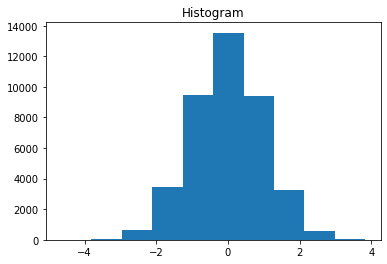

In [ ]:
temperature.plot();

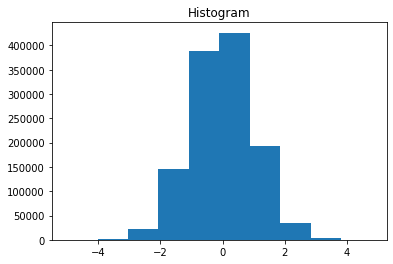

In [ ]:
new_observation2.plot();

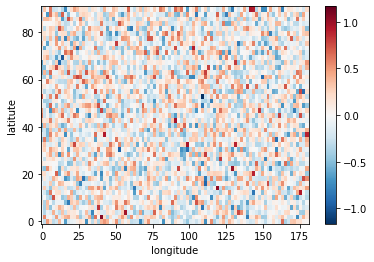

In [ ]:
temperature.mean(dim='time').plot();

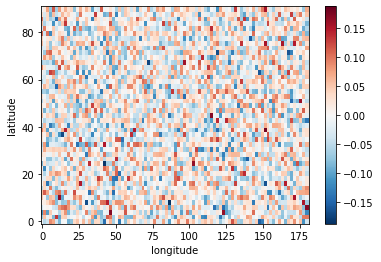

In [ ]:
new_observation2.mean(dim=['time', 'samples', 'variables']).plot();

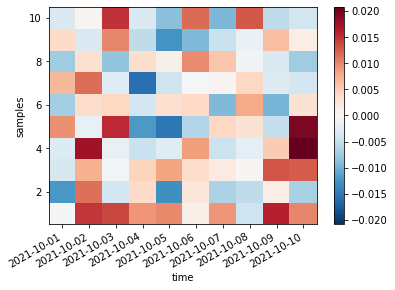

In [ ]:
new_observation2.mean(dim=['latitude', 'longitude', 'variables']).plot();

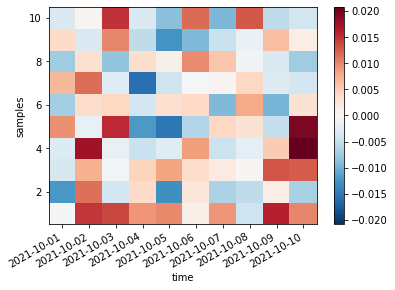

In [ ]:
new_observation2.mean(dim=['latitude', 'longitude', 'variables']).plot();

In [ ]:
temperature.sel(longitude=180, latitude=90).plot();

ValueError: ignored

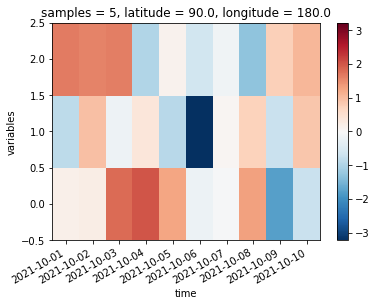

In [ ]:
new_observation2.sel(longitude=180, latitude=90, samples=5).plot();

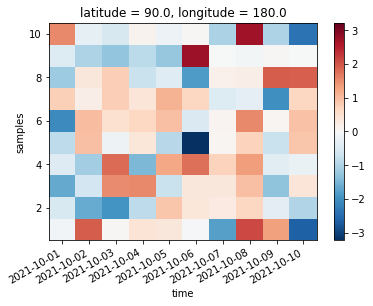

In [ ]:
new_observation2.sel(longitude=180, latitude=90, variables=1).plot();

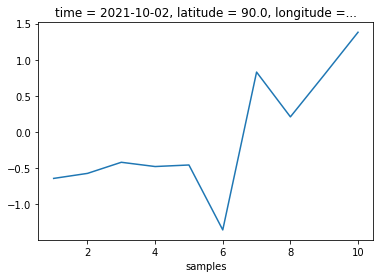

In [ ]:
new_observation2.sel(longitude=180, latitude=90, time='2021/10/02', variables=0).plot();

In [ ]:
new_observation2.sel(longitude=180, latitude=90).plot();

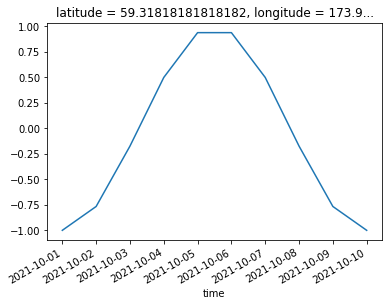

In [ ]:
new_observation2.isel(longitude=86, latitude=29, variables=2, samples=5).plot();
#isel pega pelo índice

In [ ]:
dataset = temperature.to_dataset(name='temperature')
dataset

In [ ]:
dataset.temperature

In [ ]:
dataset2 = new_observation2.to_dataset(name='new_observation2')
dataset2

In [ ]:
dataset2.new_observation2

In [ ]:
'''ds = xr.Dataset(
    data_vars=dict(
        temperature=(["x", "y", "time"], temperature),
    ),
    coords=dict(
        lon=(["x", "y"], lon),
        lat=(["x", "y"], lat),
        time=time,
        reference_time=reference_time,
    ),
    sample=dict(
        slice(0,500)
    ),
    attrs=dict(description="Dataset sintético"),
)'''

In [ ]:
'''ds = xr.Dataset(
    data_vars=dict(
        temperature=(['time', 'latitute', 'longitude'], temperature),
    ),
    coords=dict(
        coords = [time, latitude.flatten(), longitude.flatten()],
        time=time,
        reference_time=reference_time,
    ),
   
    attrs=dict(description="Dataset sintético"),
)'''

In [ ]:
'''ds = xr.Dataset(
    data_vars=dict(
        temperature=(["x", "y", "time"], temperature),
    ),
    coords=dict(
        lon=(["x", "y"], lon),
        lat=(["x", "y"], lat),
        time=time,
        reference_time=reference_time,
    ),
    sample=dict(
        slice(0,500)
    ),
    attrs=dict(description="Dataset sintético"),
)'''

In [ ]:
x = np.linspace(-np.pi, np.pi, 30)

f = np.sin(x)
da_f = xr.DataArray(f)
da_f = xr.DataArray(f, dims=['x'], coords={'x': x})
da_f.plot(marker='o')

In [ ]:
x